In [1]:
#question 1
#Importing our dataset from csv file
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    number_of_elements_Embarked=len(new_data["Embarked"])
    print("Number of elements Embarked:", number_of_elements_Embarked)
    #number of elements by category Embarked
    new_data["Embarked"].value_counts().index[0]
    #replace and display the values
    new_data["Embarked"].fillna('S',inplace=True)
    new_data["Embarked"]=new_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
    new_data['Title'] = new_data.Name.map( lambda x: x.split(', ')[1].split('.')[0])
    Title_Dictionary = {

                        "Capt":       "Officer",

                        "Col":        "Officer",

                        "Major":      "Officer",

                          "Dr":         "Officer",

                        "Rev":        "Officer",

                        "Jonkheer":   "Royalty",

                        "Don":        "Royalty",

                        "Sir" :       "Royalty",

                       "Lady" :      "Royalty",

                      "the Countess": "Royalty",

                        "Dona":       "Royalty",

                        "Mme":        "Miss",

                        "Mlle":       "Miss",

                        "Miss" :      "Miss",

                        "Ms":         "Mrs",

                        "Mr" :        "Mrs",

                        "Mrs" :       "Mrs",

                        "Master" :    "Master"}
    cleanup={"Title":Title_Dictionary}
    new_data.replace(cleanup,inplace=True)
    new_data["Title"]=new_data["Title"].map({"Officer": 1, "Royalty": 2, "Miss": 3, "Mrs": 4, "Master": 5})
    return new_data
data=preprocess_data(dataset)
data

Number of elements Embarked: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,0,4
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,0,4
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,0,4
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,0,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,1,4
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,1,4
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,0,3
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,0,4


In [2]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

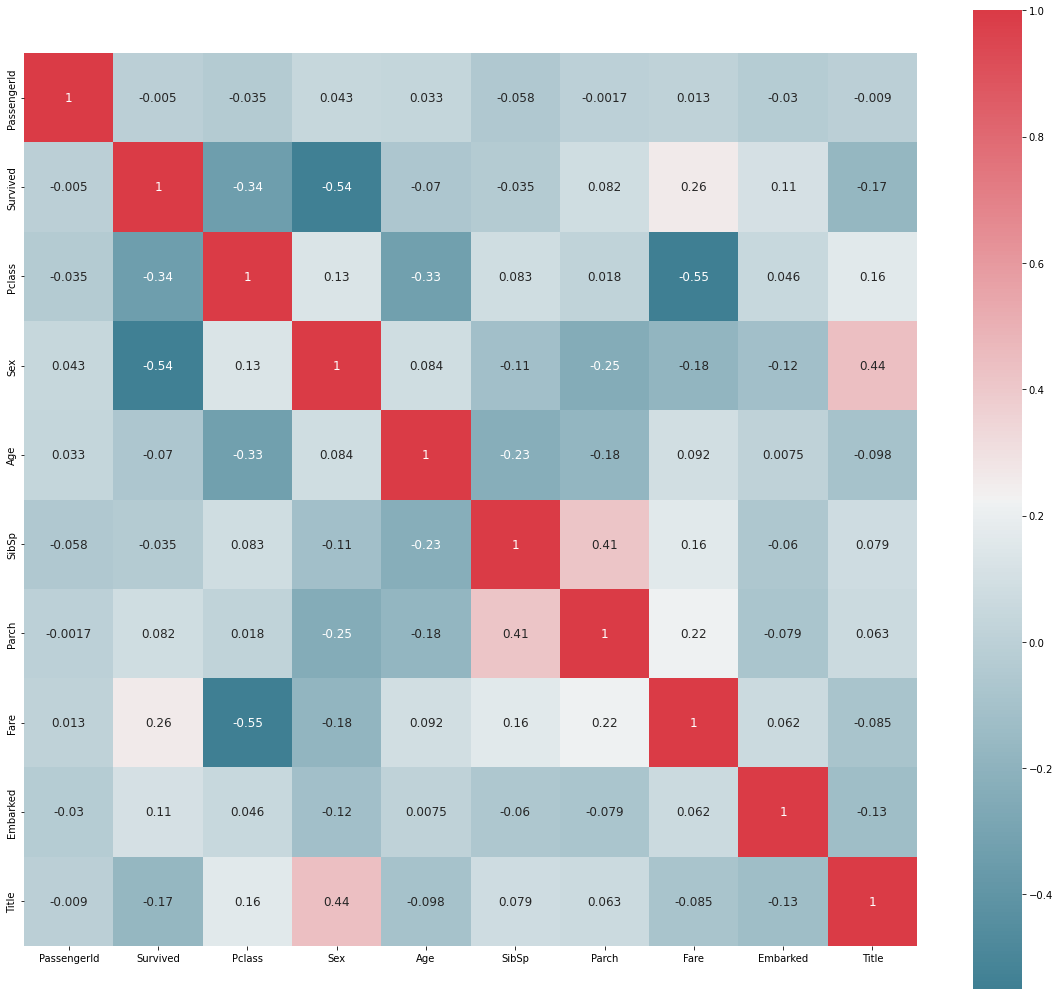

In [3]:
def plot_correlation_map( db ):

    corr = db.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

In [4]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7877094972067039


In [5]:
'''import graphviz
dot_data=tree.export_graphviz(tree1,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph
'''

'import graphviz\ndot_data=tree.export_graphviz(tree1,out_file=None)\ngraph=graphviz.Source(dot_data)\ngraph.render("data")\ngraph\n'

In [6]:
#question3
#features extraction
x=data.drop(["PassengerId", "Age", "SibSp", "Parch","Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
print(x)
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

     Pclass  Sex     Fare  Title
0         2    1  13.0000      4
1         3    1   7.6500      4
2         3    1   7.8542      4
3         3    0  21.0750      4
4         1    1  52.0000      4
..      ...  ...      ...    ...
886       2    0  30.0708      4
887       3    1   7.2292      4
888       3    0   8.6625      3
889       3    1   7.8958      4
890       2    0  26.0000      3

[891 rows x 4 columns]
score:0.8379888268156425


In [7]:
#features extraction
x=data.drop(["Survived","Name","Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
print(x)
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Title
0            343       2    1  28.000000      0      0  13.0000      4
1             76       3    1  25.000000      0      0   7.6500      4
2            641       3    1  20.000000      0      0   7.8542      4
3            568       3    0  29.000000      0      4  21.0750      4
4            672       1    1  31.000000      1      0  52.0000      4
..           ...     ...  ...        ...    ...    ...      ...    ...
886           10       2    0  14.000000      1      0  30.0708      4
887           61       3    1  22.000000      0      0   7.2292      4
888          535       3    0  30.000000      0      0   8.6625      3
889          102       3    1  29.699118      0      0   7.8958      4
890          428       2    0  19.000000      0      0  26.0000      3

[891 rows x 8 columns]
score:0.7597765363128491


In [8]:
#features extraction
x=data.drop(["PassengerId", "Age", "SibSp", "Parch","Survived", "Name", "Cabin", "Ticket", "Embarked","Fare","Pclass"], axis=1)
y= data["Survived"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
print(x)
#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

     Sex  Title
0      1      4
1      1      4
2      1      4
3      0      4
4      1      4
..   ...    ...
886    0      4
887    1      4
888    0      3
889    1      4
890    0      3

[891 rows x 2 columns]
score:0.776536312849162


In [9]:
#question 4
#the best value is when I use :Pclass,Sex and Fare as features (|correlation value|>0.2)

In [10]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['Pclass', 'Sex', 'Fare']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7985074626865671


In [11]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['Pclass', 'Sex', 'Fare', 'Embarked','Title']] #features
print(X)
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

     Pclass  Sex     Fare  Embarked  Title
0         2    1  13.0000         0      4
1         3    1   7.6500         0      4
2         3    1   7.8542         0      4
3         3    0  21.0750         0      4
4         1    1  52.0000         0      4
..      ...  ...      ...       ...    ...
886       2    0  30.0708         1      4
887       3    1   7.2292         1      4
888       3    0   8.6625         0      3
889       3    1   7.8958         0      4
890       2    0  26.0000         0      3

[891 rows x 5 columns]
Accuracy: 0.8171641791044776


In [12]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['Pclass', 'Sex']] #features
print(X)
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

     Pclass  Sex
0         2    1
1         3    1
2         3    1
3         3    0
4         1    1
..      ...  ...
886       2    0
887       3    1
888       3    0
889       3    1
890       2    0

[891 rows x 2 columns]
Accuracy: 0.7611940298507462


In [13]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

X=data[['Sex']] #features
print(X)
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

     Sex
0      1
1      1
2      1
3      0
4      1
..   ...
886    0
887    1
888    0
889    1
890    0

[891 rows x 1 columns]
Accuracy: 0.8134328358208955
